In [23]:
import tensorflow as tf

In [24]:
import tensorflow.keras.utils as np_utils
from tensorflow.keras.utils import plot_model

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import os
import cv2

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Reshape, BatchNormalization,GlobalMaxPool2D, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [26]:
path = '/kaggle/input/customfer/ck+'

In [27]:
# total number of images in the dataset

count_dict = {}
total = 0

for dir_ in os.listdir(path):
  count = 0
  for f in os.listdir(path+"/"+dir_+"/"):
    count+=1
  total += count
  count_dict[dir_] = count

for x,y in count_dict.items():
  print(f"\n {x} has {y} images.")

print(f"\n \n There are {total} images in total.")


 surprise has 249 images.

 fear has 75 images.

 neutral has 143 images.

 sadness has 84 images.

 happy has 207 images.

 anger has 135 images.

 
 There are 893 images in total.


In [28]:
img_arr = np.empty(shape=(total, *(48,48,1)))
img_label = np.empty(shape=(total))
label_to_text = {}

i=0
label = 0

for dir_ in os.listdir(path):
  label_to_text[label] = dir_
  for f in os.listdir(path+ "/" + dir_ + "/"):
            img_arr[i] = np.expand_dims(cv2.imread(path +"/"+ dir_ + "/" + f, 0), axis=2)
            img_label[i] = label
            i += 1

  print(f"loaded {dir_} images to numpy arrays...")
  label += 1

img_label = np_utils.to_categorical(img_label)
print(f"\nShapes of img_arr and img_label : {img_arr.shape} , {img_label.shape}")


loaded surprise images to numpy arrays...
loaded fear images to numpy arrays...
loaded neutral images to numpy arrays...
loaded sadness images to numpy arrays...
loaded happy images to numpy arrays...
loaded anger images to numpy arrays...

Shapes of img_arr and img_label : (893, 48, 48, 1) , (893, 6)


In [29]:
label_to_text

{0: 'surprise', 1: 'fear', 2: 'neutral', 3: 'sadness', 4: 'happy', 5: 'anger'}

In [30]:
text_to_label = dict((v,k) for k,v in label_to_text.items())
text_to_label

{'surprise': 0, 'fear': 1, 'neutral': 2, 'sadness': 3, 'happy': 4, 'anger': 5}

In [31]:
img_arr = img_arr / 255.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label,
                                                    shuffle=True, stratify=img_label,
                                                    train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((625, 48, 48, 1), (268, 48, 48, 1), (625, 6), (268, 6))

In [38]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Reshape((1,-1)))

model.add(LSTM(64))

model.add(Dense(1028,activation='relu'))
model.add(Dense(6,activation='softmax'))


model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │       540,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1028)           │        66,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         6,174 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 854,178 (3.26 MB)

 Trainable params: 854,178 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

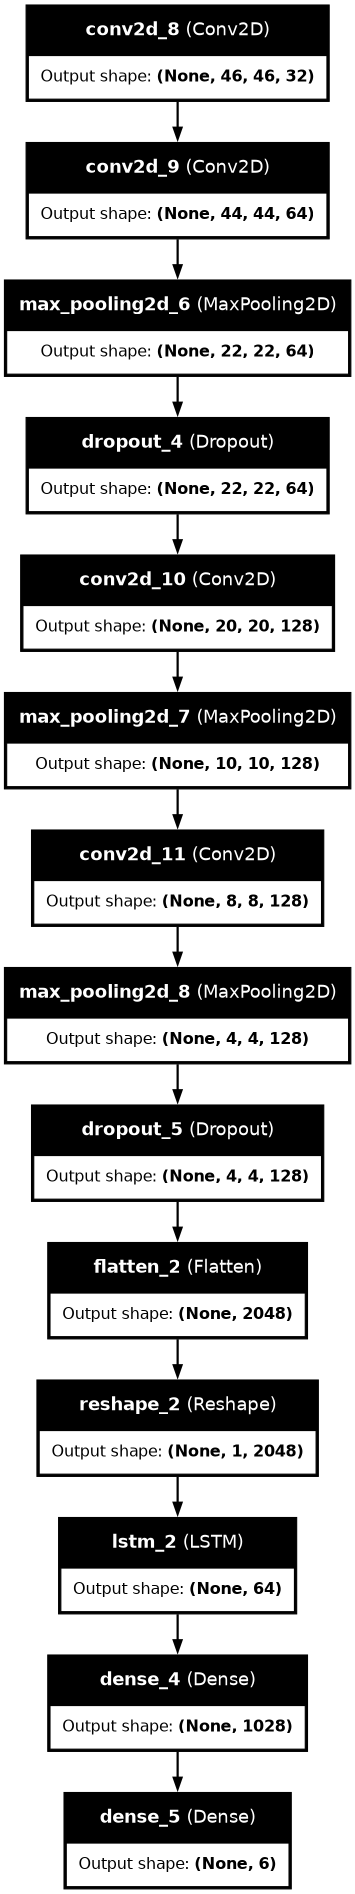

In [39]:
plot_model(model,show_shapes = True, show_layer_names=True, expand_nested=True, dpi=80)

In [40]:
train_datagen_1 = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [41]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [42]:
history = model.fit(
    train_datagen_1.flow(X_train, y_train, batch_size =20),
    validation_data=(X_test, y_test),
    epochs=75,
)

Epoch 1/75


2024-05-03 07:40:09.029477: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_4_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2750 - loss: 1.7777 - val_accuracy: 0.2799 - val_loss: 1.7052
Epoch 2/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2510 - loss: 1.7017 - val_accuracy: 0.2799 - val_loss: 1.7039
Epoch 3/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2878 - loss: 1.6846 - val_accuracy: 0.2799 - val_loss: 1.7079
Epoch 4/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2948 - loss: 1.6821 - val_accuracy: 0.2799 - val_loss: 1.7051
Epoch 5/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2831 - loss: 1.6973 - val_accuracy: 0.2799 - val_loss: 1.6910
Epoch 6/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2548 - loss: 1.6666 - val_accuracy: 0.2799 - val_loss: 1.7044
Epoch 7/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2983 - loss: 1.6633 - val_accuracy: 0.2799 - val_loss: 1.7012
Epoch 8/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2704 - loss: 1.6945 - val_accuracy: 0.2799 - val_loss: 1.

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

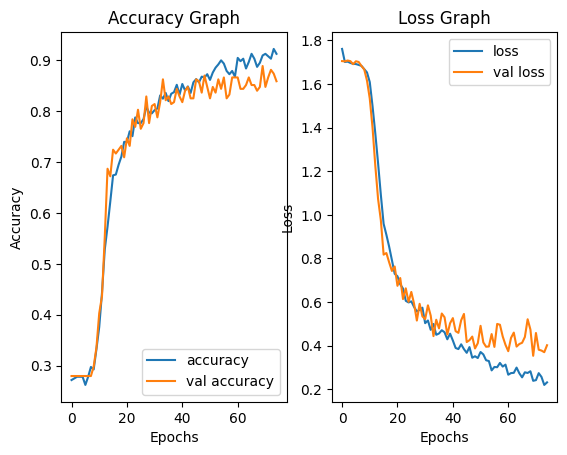

In [44]:
from matplotlib import pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

In [46]:
y_pred = model.predict(X_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[4, 3, 2, 0, 1, 4, 5, 0, 2, 0]

In [47]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[4, 3, 2, 0, 1, 4, 5, 0, 2, 0]

In [ ]:
model.save("bidirectional.keras")